#**Victims of armed conflict**

###Names of the members:

*  Sofia Gomez Rodriguez - 2242086
*  Victor Andres Martinez Preciado - 2240805
*  Juan Esteban Paredes Alvarez - 2240567
*  Sofia Reyes Molina - 2240094
*  Salome Rivas Marulanda -2242055



# **General Description of the Dataset:**

The dataset contains information about victims of the armed conflict reported in Cali, recorded from June 5, 2012, to November 30, 2023.


## **Description of the Columns:**
**code_sspm :** Sequential numbering of each row.

**date_processing:** Date on which the form or document was completed.

**code_municipality:** Postal code of the municipality.

**municipality:** Name of the municipality where the victimizing event was reported.

**sex:** The gender under which the person is registered on their identification document (male or female).

**ethnic_group:** This column indicates the ethnic group to which the victim belongs, such as Indigenous, Afro-Colombian, Mestizo, etc.

**victimization_fact:**  Refers to violations of International Humanitarian Law (IHL) and Human Rights (HR) that occurred within the framework of Article 3 of Law 1448.

**web_report_date:** Date on which the report was submitted through the web platform.

**departament:**  This column represents the geographic location where the victims of the armed conflict are recorded. In this dataset, it only includes the department of Valle del Cauca.

**date_of_birth:** This column shows the victim's date of birth, including day, month, and year.

**years_in_the_visitia:** This column indicates the age of the person at the time they were registered as a victim of the armed conflict.

**commune:** This column represents the district (comuna) where the victim lived and where the armed conflict event occurred.

**cut-off_date:** Refers to the last date on which each record was updated; it represents the cutoff date up to which the data was collected.

# **Extraction Phase**

##Link to where the dataset was taken from

https://datos.cali.gov.co/tl/dataset/poblacion-victima-del-conflicto-armado/resource/2751d517-53f9-4abb-9046-e69af95676d3

In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# dataset path

df_victims1 = pd.read_csv('../data/raw/data-population-victims-of-armed-conflict.csv',encoding='latin-1',header=None,sep=';')

/var/folders/rg/kbmd6r9s67b68_0xxzbw7hc80000gn/T/ipykernel_62190/3000176248.py:3: DtypeWarning: Columns (0: 0, 1: 2, 2: 8, 3: 9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_victims1 = pd.read_csv('../data/raw/data-population-victims-of-armed-conflict.csv',encoding='latin-1',header=None,sep=';')


#Exploration and cleanup phase

In [3]:
#To see the names of the columns
df_victims1.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,codigo_sspm,FechaDiligenciamiento,CodMunicipio,Municipio,Departamento,sexo,Grupo étnico,fechadenacimiento,Edad años en la visita,Comuna,HechoVictimizante,fechadecorte,fechareporteweb
1,1,05-jun-2012,76001,Cali,Valle del Cauca,Masculino,Mestizo,16-jun-1964,47,8,Desplazamiento forzado,30-nov-2023,4-dic-2023


In [4]:
#to see the size of the df
df_victims1.shape

(72128, 13)

In [5]:
# We used . info() to extract important information from the dataset
df_victims1.info()

<class 'pandas.DataFrame'>
RangeIndex: 72128 entries, 0 to 72127
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       71151 non-null  object
 1   1       71151 non-null  str   
 2   2       71151 non-null  object
 3   3       71151 non-null  str   
 4   4       71151 non-null  str   
 5   5       71151 non-null  str   
 6   6       71151 non-null  str   
 7   7       71151 non-null  str   
 8   8       71151 non-null  object
 9   9       71144 non-null  object
 10  10      64794 non-null  str   
 11  11      71151 non-null  str   
 12  12      71151 non-null  str   
dtypes: object(4), str(9)
memory usage: 7.2+ MB


In [6]:
# The headings did not correspond to their meaning (consecutive numbers) so we decided to change and normalize column names
#Using snake case
headers = ["code_sspm","date_processing","code_municipality","municipality","departament", "sex","ethnic_group",
         "date_of_birth","years_in_the_visitia","commune", "victimization_fact","cut-off_date","web_report_date"]

df_victims1.columns = headers

In [7]:
# delete repeated columns and reset the index
df = df_victims1.drop([0]).reset_index(drop=True)

In [8]:
df.head()

,code_sspm,date_processing,code_municipality,municipality,departament,sex,ethnic_group,date_of_birth,years_in_the_visitia,commune,victimization_fact,cut-off_date,web_report_date
0,1,05-jun-2012,76001,Cali,Valle del Cauca,Masculino,Mestizo,16-jun-1964,47,8,Desplazamiento forzado,30-nov-2023,4-dic-2023
1,2,05-jun-2012,76001,Cali,Valle del Cauca,Femenino,Mestizo,27-oct-1970,41,8,Desplazamiento forzado,30-nov-2023,4-dic-2023
2,3,05-jun-2012,76001,Cali,Valle del Cauca,Masculino,Mestizo,04-oct-1996,15,8,Desplazamiento forzado,30-nov-2023,4-dic-2023
3,4,05-jun-2012,76001,Cali,Valle del Cauca,Femenino,Mestizo,12-jun-2007,4,8,Desplazamiento forzado,30-nov-2023,4-dic-2023
4,5,25-jun-2012,76001,Cali,Valle del Cauca,Femenino,Afrodescendiente,20-may-1970,42,8,Desplazamiento forzado,30-nov-2023,4-dic-2023


In [9]:
#With .describe() we get important metrics like(count,unique,top,freq)
df_victims1.describe()

,code_sspm,date_processing,code_municipality,municipality,departament,sex,ethnic_group,date_of_birth,years_in_the_visitia,commune,victimization_fact,cut-off_date,web_report_date
count,71151,71151,71151,71151,71151,71151,71151,71151,71151,71144,64794,71151,71151
unique,71151,2593,3,2,2,3,11,23691,211,70,13,2,2
top,codigo_sspm,16-nov-2018,76001,Cali,Valle del Cauca,Femenino,Mestizo,31-dic-1938,10,15,Desplazamiento forzado,30-nov-2023,4-dic-2023
freq,1,403,65535,71150,71150,41080,24680,23,1775,12815,60499,71150,71150


# Duplicate record analysis

In [10]:
# See duplicates
df.duplicated().sum()

np.int64(976)

In [11]:
#to check for duplicate IDs
df['code_sspm'].duplicated().sum()

np.int64(976)

In [12]:
# Identify nulls in the df
df.isna().sum()

code_sspm                977
date_processing          977
code_municipality        977
municipality             977
departament              977
sex                      977
ethnic_group             977
date_of_birth            977
years_in_the_visitia     977
commune                  984
victimization_fact      7334
cut-off_date             977
web_report_date          977
dtype: int64

In [13]:
#check whether the last values correspond to null values
df.tail(978)

,code_sspm,date_processing,code_municipality,municipality,departament,sex,ethnic_group,date_of_birth,years_in_the_visitia,commune,victimization_fact,cut-off_date,web_report_date
71149,71150.0,16-nov-2023,76001.0,Cali,Valle del Cauca,Femenino,Afrocolombiano,10-ago-2009,14.0,21.0,Desplazamiento forzado,30-nov-2023,4-dic-2023
71150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#We noticed that there are some records that are completely null, so those 977 completely null records are deleted
df = df.dropna(how="all")

In [15]:
#To see the percentage of nulls in each column (victimization_fact and commune)
percentage_nulls_fact = (((df["victimization_fact"].isna().sum())/df.shape[0])*100 )
print(f'The percentage of null values in the victimization_fact column is: {percentage_nulls_fact : .2f}%')

percentage_nulls_commune = (((df["commune"].isna().sum())/df.shape[0])*100 )
print(f'The percentage of null values in the commune column is: {percentage_nulls_commune : .4f}%')

The percentage of null values in the victimization_fact column is:  8.93%
The percentage of null values in the commune column is:  0.0098%


In [16]:
#fill in blanks in victimization_fact and commune
df['victimization_fact'] = (df['victimization_fact']).fillna('No Registra')
df['commune'] = (df['commune']).fillna('No Registra')

In [17]:
# See datatype of every column
df.dtypes

code_sspm               object
date_processing            str
code_municipality       object
municipality               str
departament                str
sex                        str
ethnic_group               str
date_of_birth              str
years_in_the_visitia    object
commune                 object
victimization_fact         str
cut-off_date               str
web_report_date            str
dtype: object

In [18]:
#to work with different age
age = df['years_in_the_visitia']

In [19]:
df['years_in_the_visitia'].unique()

array(['47', '41', '15', '4', '42', '27', '0', '81', '59', '16', '22',
       '3', '40', '17', '14', '34', '8', '35', '6', '57', '28', '25',
       '66', '87', '48', '10', '71', '36', '39', '19', '13', '5', '37',
       '11', '9', '77', '51', '55', '29', '49', '18', '56', '20', '12',
       '76', '33', '50', '21', '7', '31', '2', '67', '64', '44', '-8',
       '73', '30', '52', '1', '45', '38', '-1', '75', '46', '43', '24',
       '61', '32', '23', '62', '26', '68', '60', '79', '82', '89', '74',
       '80', '54', '63', '85', '65', '53', '72', '70', '86', '69', '58',
       '84', '88', '91', '-4', '100', '98', '78', '-6', '-3', '83', '93',
       '90', '-2', '94', '92', '95', '96', '-5', '-9', '116', '99', '102',
       '115', '-12', '105', '97', '-90', 16.0, 11.0, 10.0, 67.0, 52.0,
       42.0, 22.0, 18.0, 40.0, 32.0, 5.0, 49.0, 9.0, 36.0, 29.0, 2.0,
       56.0, 59.0, 54.0, 23.0, 53.0, 34.0, 63.0, 73.0, 17.0, 12.0, 6.0,
       19.0, 7.0, 44.0, 37.0, 8.0, 14.0, 24.0, 61.0, 15.0, 33.0,

# Observation of values within the dataset columns

In [20]:
#to view the values in commune column
df["commune"].unique()

array(['8', '12', '11', '15', '9', '10', '13', '19', '3', '21', '14',
       '16', '7', '20', '1', '4', '6', '17', '2', '5', '18', '54', '0',
       '51', 'No Registra', '61', '53', '64', '62', '55', '52', '59',
       '57', '63', '60', '58', '65', '56', '22', 4.0, 6.0, 18.0, 7.0,
       15.0, 11.0, 14.0, 21.0, 20.0, 16.0, 10.0, 1.0, 17.0, 2.0, 13.0,
       5.0, 19.0, 8.0, 9.0, 12.0, 65.0, 63.0, 3.0, 54.0, 64.0, 0.0, 55.0,
       52.0, 56.0, 22.0, 53.0], dtype=object)

In [21]:
#to view the values in commune column
df["victimization_fact"].unique()

<StringArray>
[                                                                 'Desplazamiento forzado',
                                                                             'No Registra',
                                                                               'Homicidio',
                                                                                 'Amenaza',
                                                                    'Desaparicion forzada',
                                                                         'Eventos masivos',
                       'Acto terrorista/Atentados/Combates/Enfrentamientos/Hostigamientos',
                                                   'Perdida de Bienes Muebles o Inmuebles',
                                                                               'Secuestro',
                                                   'Abandono o Despojo Forzado de Tierras',
            'Lesiones personales y psicologicas que produzcan o no

In [22]:
#to view the values in years_in_the_visitia column
df["years_in_the_visitia"].unique()

array(['47', '41', '15', '4', '42', '27', '0', '81', '59', '16', '22',
       '3', '40', '17', '14', '34', '8', '35', '6', '57', '28', '25',
       '66', '87', '48', '10', '71', '36', '39', '19', '13', '5', '37',
       '11', '9', '77', '51', '55', '29', '49', '18', '56', '20', '12',
       '76', '33', '50', '21', '7', '31', '2', '67', '64', '44', '-8',
       '73', '30', '52', '1', '45', '38', '-1', '75', '46', '43', '24',
       '61', '32', '23', '62', '26', '68', '60', '79', '82', '89', '74',
       '80', '54', '63', '85', '65', '53', '72', '70', '86', '69', '58',
       '84', '88', '91', '-4', '100', '98', '78', '-6', '-3', '83', '93',
       '90', '-2', '94', '92', '95', '96', '-5', '-9', '116', '99', '102',
       '115', '-12', '105', '97', '-90', 16.0, 11.0, 10.0, 67.0, 52.0,
       42.0, 22.0, 18.0, 40.0, 32.0, 5.0, 49.0, 9.0, 36.0, 29.0, 2.0,
       56.0, 59.0, 54.0, 23.0, 53.0, 34.0, 63.0, 73.0, 17.0, 12.0, 6.0,
       19.0, 7.0, 44.0, 37.0, 8.0, 14.0, 24.0, 61.0, 15.0, 33.0,

In [23]:
#to view the values in ethnic_group column
df['ethnic_group'].unique()

<StringArray>
[         'Mestizo', 'Afrodescendiente',            'Negro',
         'Indígena',   'Afrocolombiano',             'Otro',
           'Moreno',              'Rom',       'Palenquero',
           'Raizal']
Length: 10, dtype: str

In [24]:
##to view the values in sex column
df['sex'].unique()

<StringArray>
['Masculino', 'Femenino']
Length: 2, dtype: str

In [25]:
#to view the values in departament column
df['departament'].unique()

<StringArray>
['Valle del Cauca']
Length: 1, dtype: str

In [26]:
#to view the values in municipality column
df['municipality'].unique()

<StringArray>
['Cali']
Length: 1, dtype: str

# **Transformation**

# Data type conversion and column normalization

In [27]:
#Convert columns to integer(years_in_the_visitia,code_sspm, code_municipality )
df['years_in_the_visitia'] = (df['years_in_the_visitia']).astype(int)
df['code_sspm'] = (df['code_sspm']).astype(int)
df['code_municipality'] = (df['code_municipality']).astype(int)

In [28]:
# date normalization, with the object of convert the columns to datetime
df['web_report_date'] = df['web_report_date'].str.replace('dic', 'dec')
df['date_of_birth'] = df['date_of_birth'].str.replace('ene', 'jan')
df['date_of_birth'] = df['date_of_birth'].str.replace('ago', 'aug')
df['date_of_birth'] = df['date_of_birth'].str.replace('dic', 'dec')
df['date_of_birth'] = df['date_of_birth'].str.replace('abr', 'apr')
df['date_processing'] = df['date_processing'].str.replace('ene', 'jan')
df['date_processing'] = df['date_processing'].str.replace('ago', 'aug')
df['date_processing'] = df['date_processing'].str.replace('dic', 'dec')
df['date_processing'] = df['date_processing'].str.replace('abr', 'apr')

In [29]:
#convert dates to datetime
df['web_report_date'] = pd.to_datetime(df['web_report_date'])
df['cut-off_date'] = pd.to_datetime(df['cut-off_date'])
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['date_processing'] = pd.to_datetime(df['date_processing'])

/var/folders/rg/kbmd6r9s67b68_0xxzbw7hc80000gn/T/ipykernel_62190/3021725615.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
/var/folders/rg/kbmd6r9s67b68_0xxzbw7hc80000gn/T/ipykernel_62190/3021725615.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_processing'] = pd.to_datetime(df['date_processing'])


In [30]:
df.dtypes

code_sspm                        int64
date_processing         datetime64[us]
code_municipality                int64
municipality                       str
departament                        str
sex                                str
ethnic_group                       str
date_of_birth           datetime64[us]
years_in_the_visitia             int64
commune                         object
victimization_fact                 str
cut-off_date            datetime64[us]
web_report_date         datetime64[us]
dtype: object

In [31]:
#to see ages over 100 (visualize atypical values in age)
for age in df['years_in_the_visitia']:
  if age >= 100:
    print(f'Exist {age}   ')

Exist 100   
Exist 116   
Exist 102   
Exist 115   
Exist 105   
Exist 100   
Exist 102   
Exist 102   
Exist 100   


In [32]:
#to view the values in web_report_date column
df['web_report_date'].unique()

<DatetimeArray>
['2023-12-04 00:00:00']
Length: 1, dtype: datetime64[us]

In [33]:
#to view the values in cut-off_date column
df['cut-off_date'].unique()

<DatetimeArray>
['2023-11-30 00:00:00']
Length: 1, dtype: datetime64[us]

In [34]:
#normalize values in victimization_fact (Ninos and Ninas are equal to Niños and Niñas)
df['victimization_fact'] = df['victimization_fact'].replace(
    'Vinculacion de Niños Niñas y Adolescentes a Actividades Relacionadas con grupos armados',
    'Vinculacion de Ninos Ninas y Adolescentes a Actividades Relacionadas con grupos armados'
)

In [35]:
#normalize values in ethnic_group
df['ethnic_group'] = df['ethnic_group'].replace(
    'Indígena',
    'Indigena'
)

##Bar chart of the five most frequent victimizing events

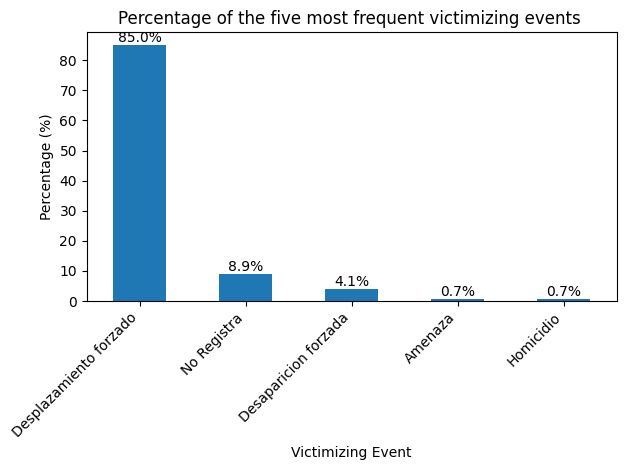

In [36]:
# Graph showing the five most frequent victimizing events in the dataset
# Count victimizing events and calculate percentages
counts = df['victimization_fact'].value_counts()
percentages = (counts / counts.sum()) * 100

# Select top 5
top_percentages = percentages.head(5)

# Bar chart
plt.figure()
top_percentages.plot(kind='bar')
plt.title('Percentage of the five most frequent victimizing events ')
plt.xlabel('Victimizing Event')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Show percentage values on bars
for i, v in enumerate(top_percentages):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [37]:
#Function to normalize the column
def normalize_commune(value):
  """
  Phase: Transform

  Description: Apply a normalization to the original dataset
  so that all records are in a single format (no decimals).

  Parameters:

value: a single value from the 'commune' column. It can be numeric(int or float) or non-numeric (string).

    Output:

Returns a string with the normalized community value
    without decimals"""
  try:# convert to float first
      num = float(value)# Convert to integer and then to string without decimals
      return str(int(num))
  except:# If it is not numerical, leave it as is.
      return str(value).strip()

#Apply the function
df["commune"] = df["commune"].apply(normalize_commune)

In [38]:
print(normalize_commune.__doc__)


  Phase: Transform

  Description: Apply a normalization to the original dataset
  so that all records are in a single format (no decimals).

  Parameters:

value: a single value from the 'commune' column. It can be numeric(int or float) or non-numeric (string).

    Output:

Returns a string with the normalized community value
    without decimals


## Transformation of the ‘commune’ column

In [39]:
#to leave only the valid communes in the city of Cali (1-22)
df["commune"] = pd.to_numeric(df["commune"], errors="coerce")

df.loc[
    (df["commune"] < 1) | (df["commune"] > 22),
    "commune"
] = np.nan

df["commune"] = df["commune"].astype("Int64")

# Now convert NA to “Not Registered”
df["commune"] = df["commune"].astype("string").fillna("No Registra")

In [40]:
# Count how many records are exactly "No Registra" and divide by the total
total_rows = len(df)
no_registered_count = (df['commune'] == "No Registra").sum()
no_registered_percentage = (no_registered_count / total_rows) * 100

no_registered_count_fact = (df['victimization_fact'] == "No Registra").sum()
no_registered_percentage_fact = (no_registered_count_fact / total_rows) * 100

print(f"The percentage of 'No Registra' in victimization_fact is: {no_registered_percentage_fact:.2f}%")
print(f"The percentage of 'No Registra' in commune is: {no_registered_percentage:.2f}%")

The percentage of 'No Registra' in victimization_fact is: 8.93%
The percentage of 'No Registra' in commune is: 2.23%


In [41]:
#to see the most common victimizing fact by commune
mode_per_commune = (
    df
    .groupby("commune")["victimization_fact"]
    .agg(lambda x: x.value_counts().idxmax())
)

print(mode_per_commune)

commune
1              Desplazamiento forzado
10             Desplazamiento forzado
11             Desplazamiento forzado
12             Desplazamiento forzado
13             Desplazamiento forzado
14             Desplazamiento forzado
15             Desplazamiento forzado
16             Desplazamiento forzado
17             Desplazamiento forzado
18             Desplazamiento forzado
19             Desplazamiento forzado
2              Desplazamiento forzado
20             Desplazamiento forzado
21             Desplazamiento forzado
22             Desplazamiento forzado
3              Desplazamiento forzado
4              Desplazamiento forzado
5              Desplazamiento forzado
6              Desplazamiento forzado
7              Desplazamiento forzado
8              Desplazamiento forzado
9              Desplazamiento forzado
No Registra    Desplazamiento forzado
Name: victimization_fact, dtype: str


## Transformation of the ‘date_of_birth’ column

In [42]:
#to see invalid dates in date_of_birth
date_min_nac = pd.Timestamp("1910-01-01")
date_max_nac = pd.Timestamp("2023-11-30")

#Validation date of birth
print("Validation date of birth\n")

nac_invalid = (
    df['date_of_birth'].notna() &
    (
        (df['date_of_birth'] < date_min_nac) |
        (df['date_of_birth'] > date_max_nac)
    )
)

print(f"Invalid date of birth: {nac_invalid.sum()}")
print(f"Nulls date of birth: {df['date_of_birth'].isna().sum()}")

Validation date of birth

Invalid date of birth: 6
Nulls date of birth: 0


In [43]:
#to see the oldest birth dates from 1910
for birth_date in df['date_of_birth']:
    if birth_date < pd.Timestamp("1910-01-01"):
        print(f'There is a date to be corrected: {birth_date}')

There is a date to be corrected: 1896-10-18 00:00:00
There is a date to be corrected: 1897-11-15 00:00:00
There is a date to be corrected: 1908-11-02 00:00:00


In [44]:
#to see birth dates after 2023
for birth_date in df['date_of_birth']:
    if birth_date > pd.Timestamp("2023-11-30"):
        print(f'There is a date to be corrected: {birth_date}')

There is a date to be corrected: 2023-12-30 00:00:00
There is a date to be corrected: 2026-01-26 00:00:00
There is a date to be corrected: 2106-11-24 00:00:00


In [45]:
print(f'The percentage of invalid dates is: {((nac_invalid.sum()/df.shape[0])*100 ) :.4f}%')

The percentage of invalid dates is: 0.0084%


In [46]:
#to validate and correct dates of birth
# Valid limits (people who were born from 1910-01-01 to 2023-11-30)
min_date = pd.Timestamp("1910-01-01")
max_date = pd.Timestamp("2023-11-30")

# Remove dates outside the valid range
df = df[
    (df["date_of_birth"] >= min_date) &
    (df["date_of_birth"] <= max_date)
]

# Final size
print("Number of records after filtering:", len(df))

Number of records after filtering: 71144


## Histogram (years_in_the_visitia)

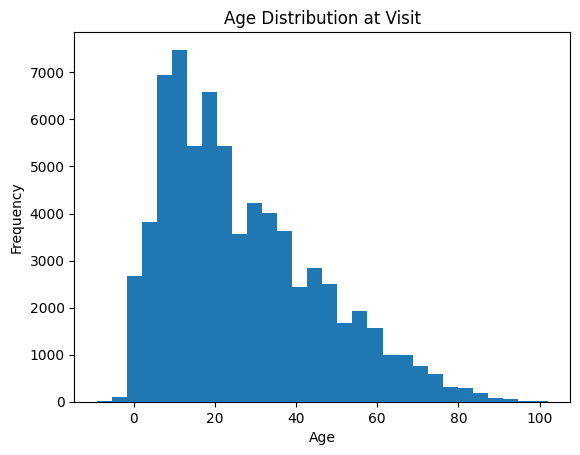

In [47]:
#graph showing the age distribution
# Create histogram
plt.figure()
plt.hist(df["years_in_the_visitia"].dropna(), bins=30)
plt.title("Age Distribution at Visit")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [48]:
#to see negative ages
for age in df['years_in_the_visitia']:
    if age < 0:
        print(f'There is a value to be corrected: {age}')

There is a value to be corrected: -8
There is a value to be corrected: -1
There is a value to be corrected: -1
There is a value to be corrected: -1
There is a value to be corrected: -1
There is a value to be corrected: -1
There is a value to be corrected: -4
There is a value to be corrected: -1
There is a value to be corrected: -6
There is a value to be corrected: -4
There is a value to be corrected: -6
There is a value to be corrected: -3
There is a value to be corrected: -6
There is a value to be corrected: -1
There is a value to be corrected: -1
There is a value to be corrected: -1
There is a value to be corrected: -3
There is a value to be corrected: -1
There is a value to be corrected: -1
There is a value to be corrected: -3
There is a value to be corrected: -1
There is a value to be corrected: -1
There is a value to be corrected: -4
There is a value to be corrected: -1
There is a value to be corrected: -1
There is a value to be corrected: -1
There is a value to be corrected: -1
T

In [49]:
#to recalculate negative ages taking into account the date of birth and registration date
# Identify invalid ages (range from 0 to 113)
invalid_ages = (
    (df["years_in_the_visitia"] < 0) |
    (df["years_in_the_visitia"] > 113)
)
# Select only rows to be corrected and with valid dates
m = invalid_ages & df["date_processing"].notna() & df["date_of_birth"].notna()

# Extract relevant dates
fd = df.loc[m, "date_processing"]
fn = df.loc[m, "date_of_birth"]

# Age = year difference minus 1 if birthday has not occurred yet
age = fd.dt.year - fn.dt.year - (
    (fd.dt.month < fn.dt.month) |
    ((fd.dt.month == fn.dt.month) & (fd.dt.day < fn.dt.day))
).astype(int)

# Update corrected age in the DataFrame
df.loc[m, "years_in_the_visitia"] = age

In [50]:
#Filter records where the date of birth is later than the processing date
birth_later = df[
    df['date_of_birth'] > df['date_processing']
]

#Show how many inconsistent cases exist
print("Number of inconsistencies:", birth_later.shape[0])

#see problematic rows
birth_later[['date_of_birth', 'date_processing', 'years_in_the_visitia']]

Number of inconsistencies: 206


,date_of_birth,date_processing,years_in_the_visitia
110,2020-06-08,2012-06-26,-8
146,2012-08-10,2012-06-28,-1
207,2013-05-02,2012-07-06,-1
294,2016-10-28,2016-07-01,-1
296,2016-10-05,2016-07-01,-1
...,...,...,...
55504,2015-12-26,2015-04-15,-1
55979,2018-01-14,2015-12-07,-3
56032,2016-06-09,2016-02-19,-1
56382,2018-11-23,2016-09-06,-3


In [51]:
#to see the percentage of meaningless dates
print(f"Percentage of inconsistent records (records where the date of birth is later than the date of processing ): {(len(birth_later) / len(df)) * 100:.2f}%")

Percentage of inconsistent records (records where the date of birth is later than the date of processing ): 0.29%


In [52]:
# Remove records where birth date is later than processing date
df = df[df['date_of_birth'] <= df['date_processing']]

In [53]:
#to view the number of registration dates older than (2012-06-05) and greater than (2023-11-30)
minor_2012 = df[df["date_processing"] < pd.to_datetime("2012-06-05")]
print(f"Dates later than 2012: {minor_2012.shape[0]}")

after_2023 = df[df["date_processing"] > pd.to_datetime("2023-12-30")]
print(f"Dates after 2023: {after_2023.shape[0]}")

Dates later than 2012: 288
Dates after 2023: 0


In [54]:
#to see the percentage of meaningless dates
print(f"Percentage of inconsistent records (records where the date of birth is later than the date of processing ): {(len(minor_2012) / len(df)) * 100:.2f}%")

Percentage of inconsistent records (records where the date of birth is later than the date of processing ): 0.41%


In [55]:
#Removes processing dates before than (2012-06-05)
#Define minimum valid date
min_valid_date = pd.to_datetime("2012-06-05")

# Remove records older than the minimum valid date
df = df[df["date_processing"] >= min_valid_date]

print("Records remaining after removing dates older than 2012-06-05:", len(df))

Records remaining after removing dates older than 2012-06-05: 70650


## Add the new 'Classification' column

In [56]:
#make a copy of the df to transform and add new columns
df_transform = df.copy()

In [57]:
#categorize by age
# Define range limits
bins = [-1, 13, 26, 59, np.inf]

# Define labels
labels = [
    "Childhood",
    "Youth",
    "Adulthood",
    "Older adults"
]

# Create new column
df_transform["classification"] = pd.cut(
    df_transform["years_in_the_visitia"],
    bins=bins,
    labels=labels
)

/var/folders/rg/kbmd6r9s67b68_0xxzbw7hc80000gn/T/ipykernel_62190/1238146161.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_transform["classification"], order=labels, palette="viridis")


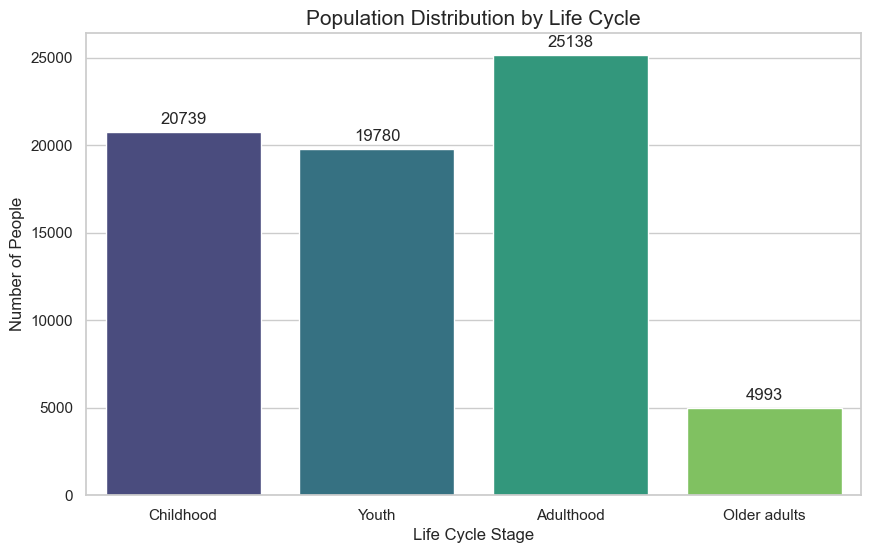

In [58]:
#age classification chart
#We configure the style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

#We created the counting chart
ax = sns.countplot(x=df_transform["classification"], order=labels, palette="viridis")

#We add titles
plt.title("Population Distribution by Life Cycle", fontsize=15)
plt.xlabel("Life Cycle Stage", fontsize=12)
plt.ylabel("Number of People", fontsize=12)

#Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.show()

In [59]:
#Transformation to calculate the vulnerability level based on gender, ethnic group, and victimization fact
#create different columns that assign scores according to each victim's records
#p_age
map_p_age = {
    "Childhood": 2,
    "Youth": 1,
    "Adulthood": 1,
    "Older adults": 2
}
df_transform["p_age"] = df_transform['classification'].map(map_p_age)

#p_sex
df_transform["p_sex"] = np.select(
    [
        df_transform['sex'] == "Femenino",
        df_transform['sex'] == "Masculino"
    ],
    [2, 1],
)

#p_ethnicity
ethnicity_2 = [
    "Indigena", "Afrodescendiente", "Afrocolombiano",
    "Palenquero", "Raizal", "Rom"
]

ethnicity_1 = [
    "Mestizo", "Negro", "Moreno", "Otro"
]

df_transform["p_ethnicity"] = np.select(
    [
        df_transform['ethnic_group'].isin(ethnicity_2),
        df_transform['ethnic_group'].isin(ethnicity_1)
    ],
    [2, 1],
)

# p_fact
high_3 = [
    "Desplazamiento forzado",
    "Homicidio",
    "Delitos contra la libertad y la integridad sexual en desarrollo del conflicto armado"
]

medium_2 = [
    "Amenaza",
    "Desaparicion forzada",
    "Secuestro",
    "Abandono o Despojo Forzado de Tierras",
    "Acto terrorista/Atentados/Combates/Enfrentamientos/Hostigamientos",
    "Lesiones personales y psicologicas que produzcan o no incapacidad permanente",
    "Vinculacion de Ninos Ninas y Adolescentes a Actividades Relacionadas con grupos armados",
    "Perdida de Bienes Muebles o Inmuebles",
    "Eventos masivos"
]

df_transform["p_fact"] = np.select(
    [
        df_transform['victimization_fact'].isin(high_3),
        df_transform['victimization_fact'].isin(medium_2),
        df_transform['victimization_fact'] == "No Registra"
    ],
    [3, 2, 1],
)

#Calculate the vulnerability index

df_transform["vulnerability_index"] = df_transform[
    ["p_age", "p_sex", "p_ethnicity", "p_fact"]
].sum(axis=1, min_count=4)

#We check for missing values in the variables used to build the index and validate that the vulnerability index values are within a logical range.

print("\n Records with NaN values in weights ")
for c in ["p_age", "p_sex", "p_ethnicity", "p_fact"]:
    print(c, df_transform[c].isna().sum())

print("\n Index range ")
idx = df_transform["vulnerability_index"]
print("Min:", idx.min(), "Max:", idx.max())

#This block identifies the communes with the highest levels of social vulnerability by combining
#average vulnerability scores and the proportion of highly vulnerable cases

cali = df_transform[df_transform['commune'].notna()].copy()

avg_by_commune = (
    cali.groupby('commune')["vulnerability_index"]
    .mean()
    .reset_index(name="avg_index")
    .sort_values("avg_index", ascending=False)
)

top10 = avg_by_commune.head(10)

print("\n  TOP 10 most vulnerable communes ")
print(top10)



 Records with NaN values in weights 
p_age 0
p_sex 0
p_ethnicity 0
p_fact 0

 Index range 
Min: 4 Max: 9

  TOP 10 most vulnerable communes 
   commune  avg_index
15       3   7.387800
6       15   7.307174
13      21   7.296173
4       13   7.289743
10      19   7.281356
5       14   7.229598
7       16   7.147573
19       7   7.131349
8       17   7.091743
16       4   7.058493


# Encoding

In [60]:
# We use label encoding to transform the ethnicity column
# Create the LabelEncoder
label_encoder = LabelEncoder()

#Apply Label Encoding
df_transform['ethnic_group_encoded'] = label_encoder.fit_transform(df_transform['ethnic_group'])

#Display the unique mapping: Ethnic group maps to code
ethnic_group_mapping = dict(
    zip(
        label_encoder.classes_,
        label_encoder.transform(label_encoder.classes_)
    )
)

print("\n Ethnic Group maps to  Code Mapping")
for group, code in ethnic_group_mapping.items():
    print(f"{group} maps to  {code}")

#Generate a dimension table to validate and document the ethnic group encoding process
dim_ethnic_group = (
    df_transform[['ethnic_group', 'ethnic_group_encoded']]
    .drop_duplicates()
    .sort_values('ethnic_group_encoded')
)


 Ethnic Group maps to  Code Mapping
Afrocolombiano maps to  0
Afrodescendiente maps to  1
Indigena maps to  2
Mestizo maps to  3
Moreno maps to  4
Negro maps to  5
Otro maps to  6
Palenquero maps to  7
Raizal maps to  8
Rom maps to  9


In [61]:
#Convert the 'sex' categorical variable into binary (one-hot) encoded columns for analysis
binary = pd.get_dummies(
    df_transform['sex'],
    prefix='sex',
    dtype=int
)

df_transform = pd.concat([df_transform, binary], axis=1)